**EXPLAINABLE AI (XAI) IMPLEMENTATION - USA DATASET**

# Importing the libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import PartialDependenceDisplay

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Importing the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
usa_data = pd.read_excel("drive/MyDrive/datasets_ont_lab/DataSet_USA_3k_5k.xlsx")

# Data preprocessing



Display the first few rows of the dataset

In [5]:
usa_data.head()

Power_1   Power_2   Power_3   Power_4   Power_5   Power_6   Power_7  \
0  0.000000  0.000000  0.000096  0.000096  0.000096  0.000000  0.000096   
1  0.000000  0.000096  0.000000  0.000096  0.000000  0.000096  0.000000   
2  0.000000  0.000000  0.000000  0.000096  0.000000  0.000000  0.000000   
3  0.000096  0.000096  0.000095  0.000095  0.000096  0.000000  0.000000   
4  0.000000  0.000000  0.000096  0.000000  0.000096  0.000000  0.000000   

   Power_8   Power_9  Power_10  ...    GSNR_72    GSNR_73    GSNR_74  \
0      0.0  0.000096       0.0  ...   0.000000   0.000000  26.391513   
1      0.0  0.000000       0.0  ...   0.000000  25.764675   0.000000   
2      0.0  0.000096       0.0  ...   0.000000   0.000000   0.000000   
3      0.0  0.000096       0.0  ...  22.810189   0.000000   0.000000   
4      0.0  0.000096       0.0  ...  21.211149  21.131602  21.349516   

     GSNR_75    GSNR_76       Source        Destination  No. Spans  \
0   0.000000   0.000000  trxHouston0  trxJacksonville58         23   
1   0.000000   0.000000  trxHouston0  trxJacksonville58         23   
2  24.616361  24.297057  trxHouston0  trxJacksonville58         23   
3   0.000000   0.000000  trxHouston0  trxJacksonville58         23   
4  22.572032   0.000000  trxHouston0  trxJacksonville58         23   

   Total Distance(m)  Number of ON channels  
0          2050305.0                     26  
1          2050305.0                     26  
2          2050305.0                     26  
3          2050305.0                     26  
4          2050305.0                     26  

[5 rows x 537 columns]

Calculating number of attribute columns

In [6]:
attribute_columns = [f'Power_{i}' for i in range(1, 77)] + [f'ASE_{i}' for i in range(1, 77)] + [f'NLI_{i}' for i in range(1, 77)] + ['No. Spans'] + ['Total Distance(m)'] + [f'frequency_{i}' for i in range(1, 77)]

print(len(attribute_columns))

306


In [7]:
target_column = 'GSNR_1'

Applying feature scaling


In [9]:
scaler = MinMaxScaler()
X = scaler.fit_transform(usa_data[attribute_columns])
X = pd.DataFrame(X, columns=attribute_columns)

label = usa_data[target_column].values.reshape(-1, 1)
y = scaler.fit_transform(label)
y = pd.DataFrame(y, columns=[target_column])

In [10]:
X.head()

Power_1   Power_2   Power_3   Power_4   Power_5   Power_6   Power_7  \
0  0.000000  0.000000  0.978233  0.975451  0.977015  0.000000  0.978621   
1  0.000000  0.982433  0.000000  0.980943  0.000000  0.981939  0.000000   
2  0.000000  0.000000  0.000000  0.984089  0.000000  0.000000  0.000000   
3  0.977579  0.976154  0.974709  0.974548  0.977687  0.000000  0.000000   
4  0.000000  0.000000  0.982810  0.000000  0.982117  0.000000  0.000000   

   Power_8   Power_9  Power_10  ...  frequency_67  frequency_68  frequency_69  \
0      0.0  0.978333       0.0  ...           0.0           0.0           0.0   
1      0.0  0.000000       0.0  ...           0.0           0.0           0.0   
2      0.0  0.982952       0.0  ...           0.0           0.0           0.0   
3      0.0  0.979911       0.0  ...           0.0           0.0           0.0   
4      0.0  0.982795       0.0  ...           0.0           0.0           0.0   

   frequency_70  frequency_71  frequency_72  frequency_73  frequency_74  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   frequency_75  frequency_76  
0           0.0           0.0  
1           0.0           0.0  
2           0.0           0.0  
3           0.0           0.0  
4           0.0           0.0  

[5 rows x 306 columns]

In [11]:
y.head()

GSNR_1
0  0.000000
1  0.000000
2  0.000000
3  0.013061
4  0.000000

# Splitting dataset into training set and test set

In [12]:
# Define the function to split data according to the specified pattern
def custom_train_test_split(data, labels, samples_per_block=3000, train_samples_per_block=2500, test_samples_per_block=500):
    train_data = []
    test_data = []
    train_labels = []
    test_labels = []

    total_samples = len(data)

    for start in range(0, total_samples, samples_per_block):
        end = start + samples_per_block
        train_end = start + train_samples_per_block

        if train_end > total_samples:
            train_end = total_samples
        if end > total_samples:
            end = total_samples

        train_data.append(data[start:train_end])
        test_data.append(data[train_end:end])
        train_labels.append(labels[start:train_end])
        test_labels.append(labels[train_end:end])

    train_data = pd.concat(train_data).reset_index(drop=True)
    test_data = pd.concat(test_data).reset_index(drop=True)
    train_labels = pd.concat(train_labels).reset_index(drop=True)
    test_labels = pd.concat(test_labels).reset_index(drop=True)

    return train_data, test_data, train_labels, test_labels

In [13]:
attribute_columns_without_frequency = [col for col in attribute_columns if not col.startswith('frequency')]

In [14]:
X_train, X_test, y_train, y_test = custom_train_test_split(X[attribute_columns_without_frequency], y[target_column])

In [15]:
print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Train labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Train data shape: (30000, 230)
Test data shape: (6000, 230)
Train labels shape: (30000,)
Test labels shape: (6000,)


# Training Regression Models

Initialize models

In [16]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor()
}

Fitting models

In [17]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f"{model_name}: MSE = {mse:.5f}")

Linear Regression: MSE = 0.02536
Random Forest Regression: MSE = 0.00002
Gradient Boosting Regression: MSE = 0.00002
Decision Tree Regression: MSE = 0.00003


# XAI Implementation


In [18]:
!pip install shap lime pdpbox

In [19]:
import shap
import lime
from lime.lime_tabular import LimeTabularExplainer
from pdpbox import pdp, info_plots

In [20]:
features_to_plot = ['Power_1', 'NLI_1', 'ASE_1', 'No. Spans', 'Total Distance(m)']

## SHAP for Global Interpretability


Linear Regression SHAP Summary Plot:


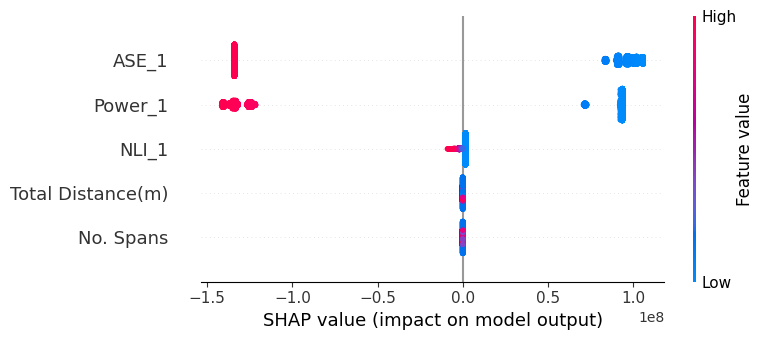


Linear Regression SHAP Dependence Plot for feature: Power_1


<Figure size 500x300 with 0 Axes>

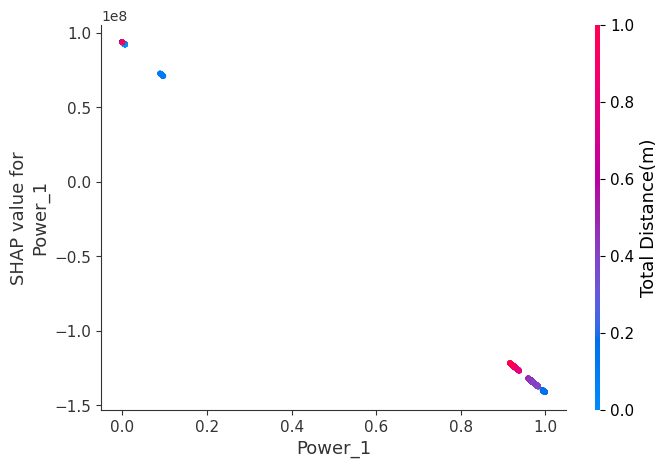


Linear Regression SHAP Dependence Plot for feature: NLI_1


<Figure size 500x300 with 0 Axes>

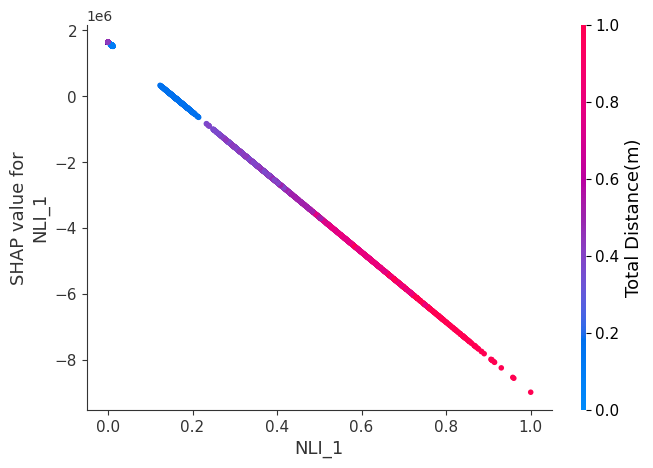


Linear Regression SHAP Dependence Plot for feature: ASE_1


<Figure size 500x300 with 0 Axes>

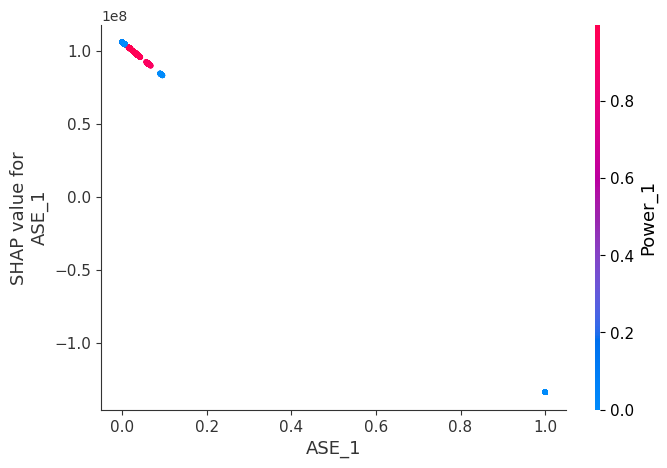


Linear Regression SHAP Dependence Plot for feature: No. Spans


<Figure size 500x300 with 0 Axes>

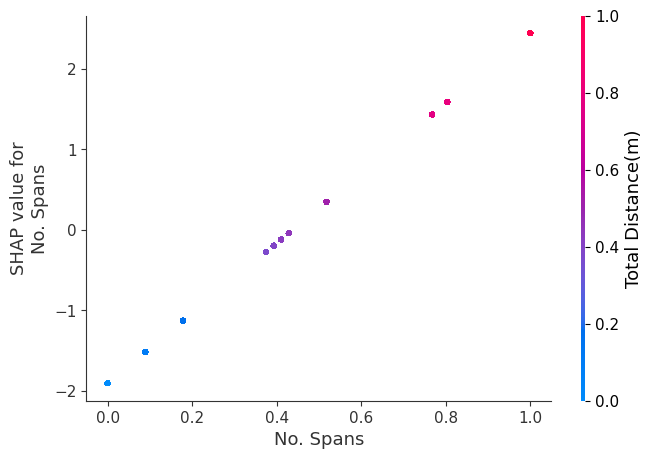


Linear Regression SHAP Dependence Plot for feature: Total Distance(m)


<Figure size 500x300 with 0 Axes>

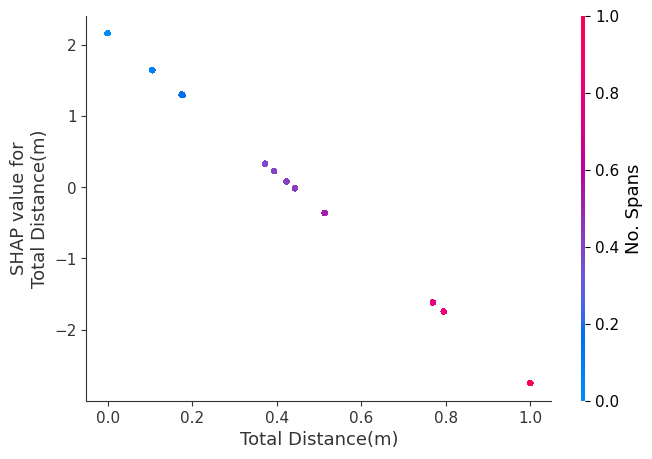

 99%|===================| 5953/6000 [02:10<00:01]       


Random Forest Regression SHAP Summary Plot:


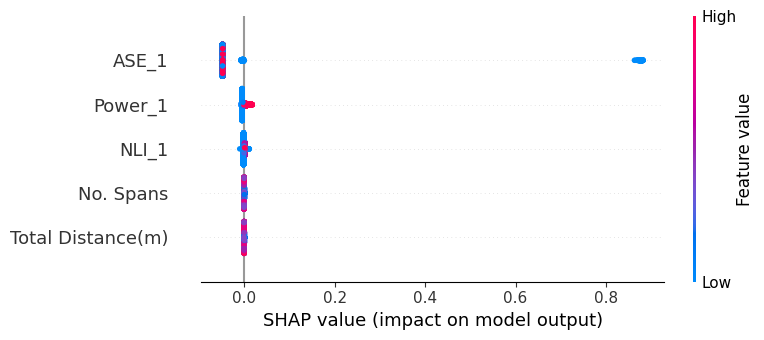


Random Forest Regression SHAP Dependence Plot for feature: Power_1


<Figure size 500x300 with 0 Axes>

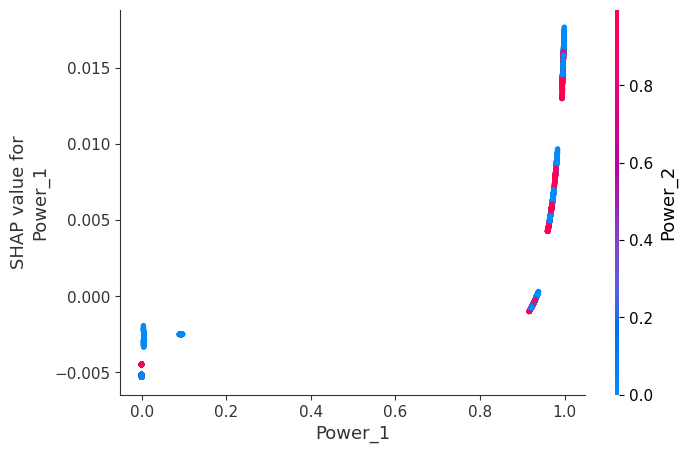


Random Forest Regression SHAP Dependence Plot for feature: NLI_1


<Figure size 500x300 with 0 Axes>

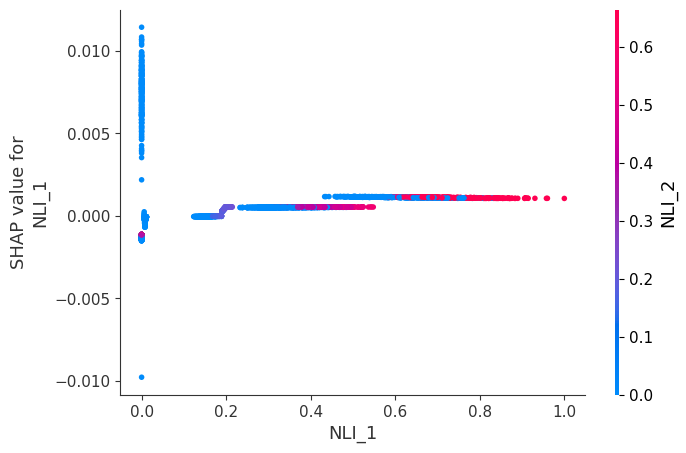


Random Forest Regression SHAP Dependence Plot for feature: ASE_1


<Figure size 500x300 with 0 Axes>

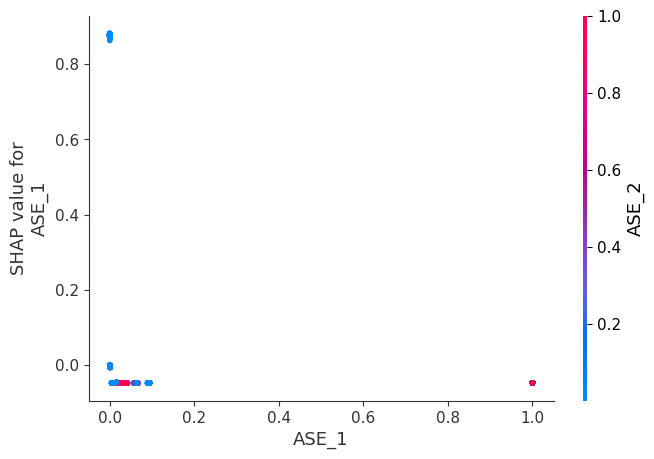


Random Forest Regression SHAP Dependence Plot for feature: No. Spans


<Figure size 500x300 with 0 Axes>

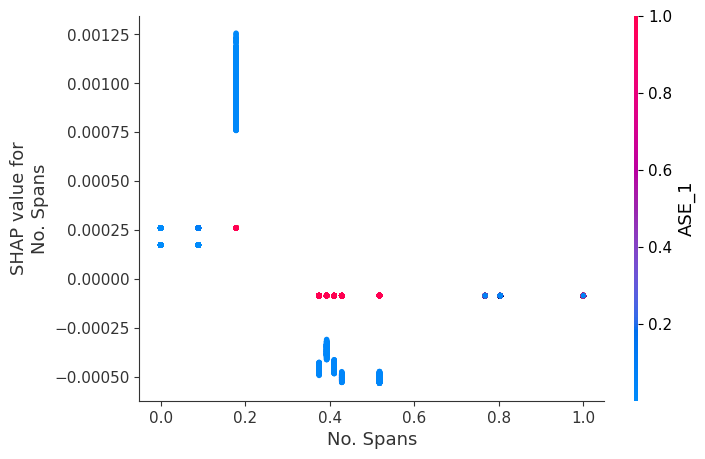


Random Forest Regression SHAP Dependence Plot for feature: Total Distance(m)


<Figure size 500x300 with 0 Axes>

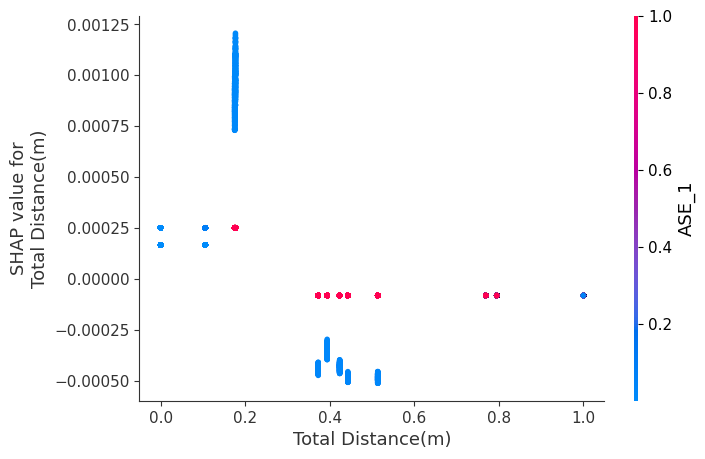


Gradient Boosting Regression SHAP Summary Plot:


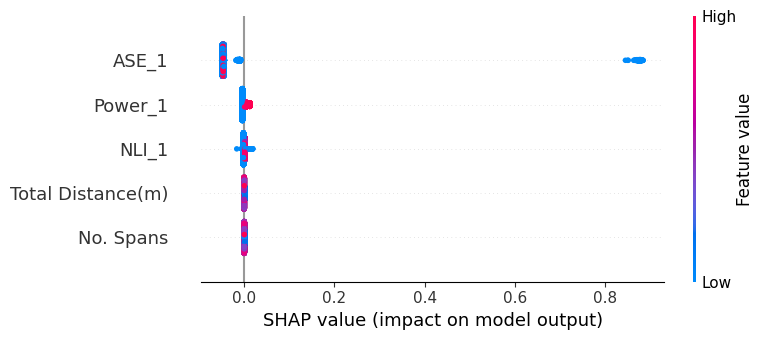


Gradient Boosting Regression SHAP Dependence Plot for feature: Power_1


<Figure size 500x300 with 0 Axes>

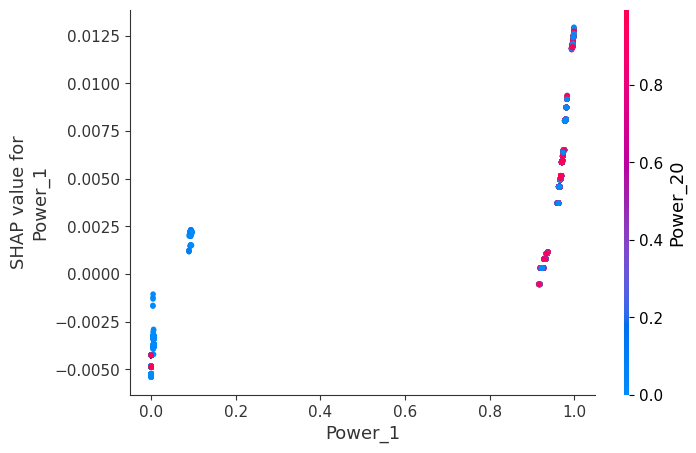


Gradient Boosting Regression SHAP Dependence Plot for feature: NLI_1


<Figure size 500x300 with 0 Axes>

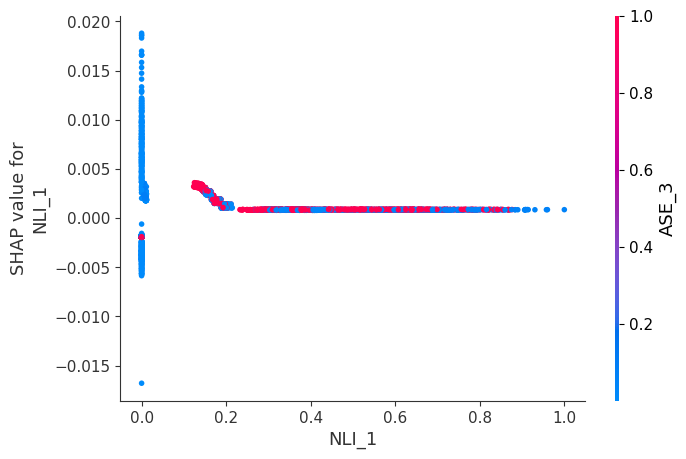


Gradient Boosting Regression SHAP Dependence Plot for feature: ASE_1


<Figure size 500x300 with 0 Axes>

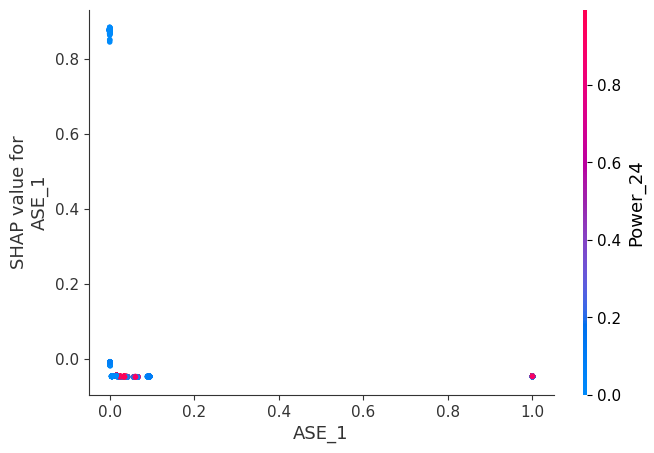


Gradient Boosting Regression SHAP Dependence Plot for feature: No. Spans


<Figure size 500x300 with 0 Axes>

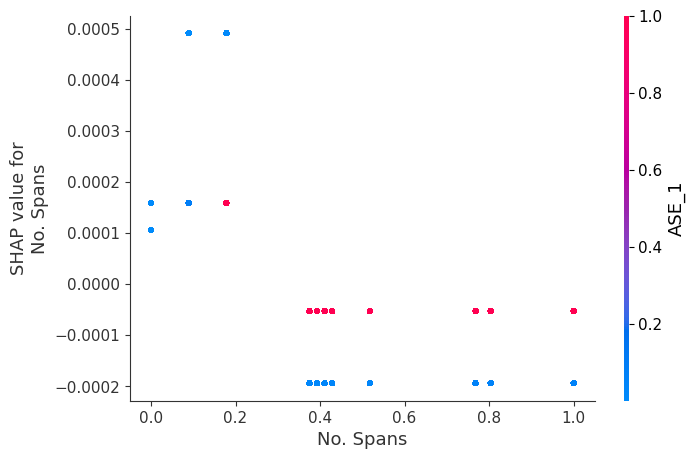


Gradient Boosting Regression SHAP Dependence Plot for feature: Total Distance(m)


<Figure size 500x300 with 0 Axes>

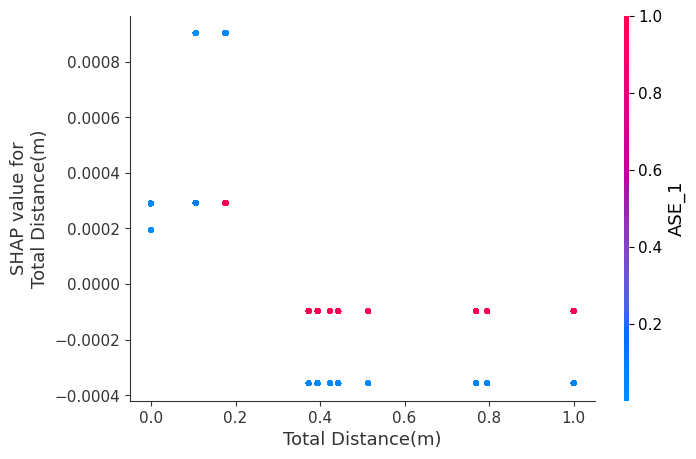


Decision Tree Regression SHAP Summary Plot:


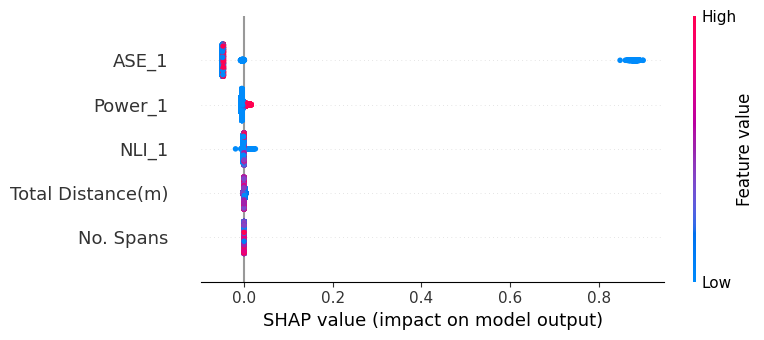


Decision Tree Regression SHAP Dependence Plot for feature: Power_1


<Figure size 500x300 with 0 Axes>

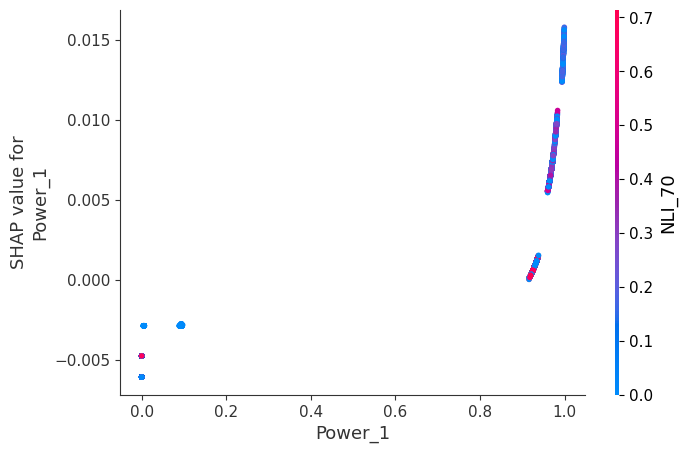


Decision Tree Regression SHAP Dependence Plot for feature: NLI_1


<Figure size 500x300 with 0 Axes>

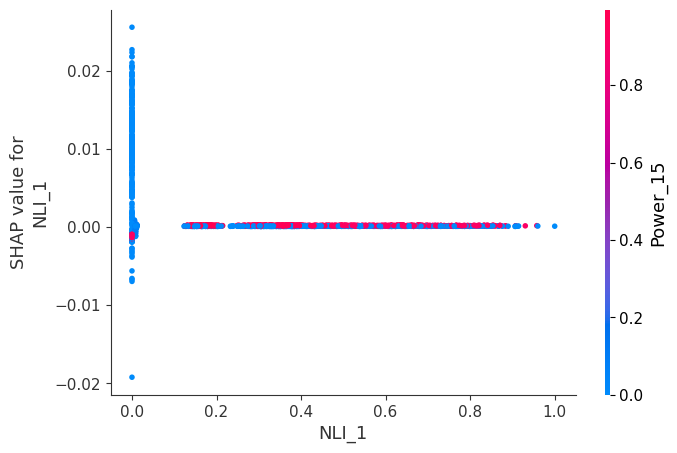


Decision Tree Regression SHAP Dependence Plot for feature: ASE_1


<Figure size 500x300 with 0 Axes>

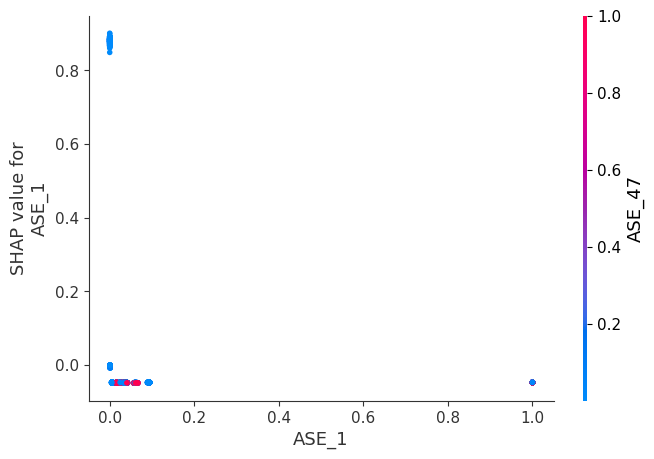


Decision Tree Regression SHAP Dependence Plot for feature: No. Spans


<Figure size 500x300 with 0 Axes>

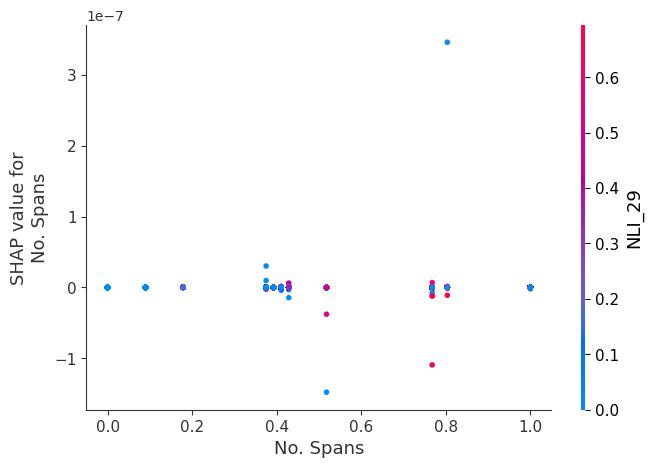


Decision Tree Regression SHAP Dependence Plot for feature: Total Distance(m)


<Figure size 500x300 with 0 Axes>

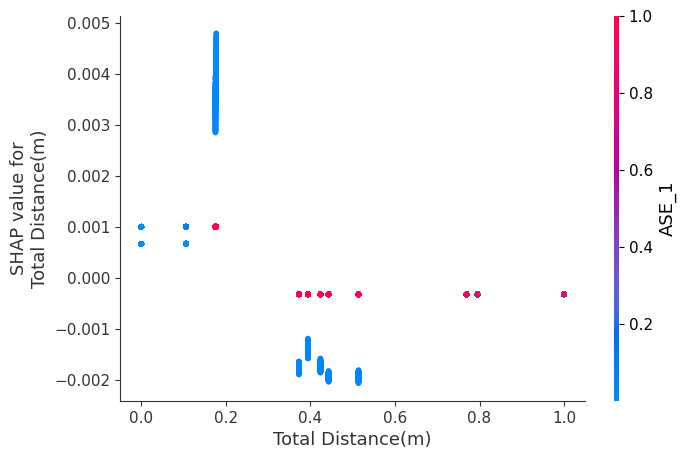

In [23]:
for model_name, model in models.items():
    if model_name in ["Linear Regression"]:  # Adjust this list for models requiring LinearExplainer
        explainer = shap.LinearExplainer(model, X_train)
    else:
        explainer = shap.Explainer(model, X_train)

    shap_values = explainer(X_test)

    # Filter mxdata_test to include only the specified features
    filtered_data = X_test[features_to_plot]

    # Summary Plot with smaller figure size
    print(f"\n{model_name} SHAP Summary Plot:")
    plt.figure(figsize=(4, 4))  # Adjust the figure size as needed (width, height)
    shap.summary_plot(shap_values[:, [X_test.columns.get_loc(feature) for feature in features_to_plot]],
                      filtered_data, feature_names=features_to_plot)
    plt.show()

    # Dependence Plots for all specified features
    for feature in features_to_plot:
        print(f"\n{model_name} SHAP Dependence Plot for feature: {feature}")
        plt.figure(figsize=(5, 3))  # Adjust the figure size as needed (width, height)
        shap.dependence_plot(feature, shap_values.values if hasattr(shap_values, 'values') else shap_values, X_test)
        plt.show()

# for model_name, model in models.items():
#     if model_name in ["Linear Regression"]:
#         explainer = shap.LinearExplainer(model, X_train)
#     else:
#         explainer = shap.TreeExplainer(model)  # Explicitly use TreeExplainer
#         explainer.check_additivity = False  # Disable additivity check after initialization

#     shap_values = explainer(X_test)

#     # Filter X_test to include only the specified features
#     filtered_data = X_test[features_to_plot]

#     # Summary Plot with smaller figure size
#     print(f"\n{model_name} SHAP Summary Plot:")
#     plt.figure(figsize=(4, 4))  # Adjust the figure size as needed (width, height)
#     shap.summary_plot(shap_values[:, [X_test.columns.get_loc(feature) for feature in features_to_plot]],
#                       filtered_data, feature_names=features_to_plot)
#     plt.show()

#     # Dependence Plots for all specified features
#     for feature in features_to_plot:
#         print(f"\n{model_name} SHAP Dependence Plot for feature: {feature}")
#         plt.figure(figsize=(5, 3))  # Adjust the figure size as needed (width, height)
#         shap.dependence_plot(feature, shap_values.values if hasattr(shap_values, 'values') else shap_values, X_test)
#         plt.show()

## Lime for Local Interpretebility

In [24]:
for model_name, model in models.items():
    explainer = LimeTabularExplainer(training_data = np.array(X_train),
                                     feature_names = X_train.columns,
                                     mode='regression')

    # Explain a specific instance (e.g., first instance in the test set)
    i = 0  # You can loop over multiple instances or select specific ones
    exp = explainer.explain_instance(X_test.iloc[i], model.predict, num_features = len(features_to_plot))

    # Filter the explanation to include only the specified features
    exp_list = [(name, weight) for name, weight in exp.as_list() if name in features_to_plot]

    print(f"\n{model_name} - LIME Explanation for instance {i} only:")

    # You can visualize the filtered explanation in the notebook
    exp.show_in_notebook(show_all=False)

    # Manually print the filtered explanation
    for feature_name, feature_weight in exp_list:
        print(f"{feature_name}: {feature_weight}")


Linear Regression - LIME Explanation for instance 0 only:



Random Forest Regression - LIME Explanation for instance 0 only:



Gradient Boosting Regression - LIME Explanation for instance 0 only:



Decision Tree Regression - LIME Explanation for instance 0 only:


## PDP for Feature Influence

Linear Regression: MSE = 0.02536
Calculating PDP for Linear Regression on features: ['Power_1', 'NLI_1', 'ASE_1', 'No. Spans', 'Total Distance(m)']


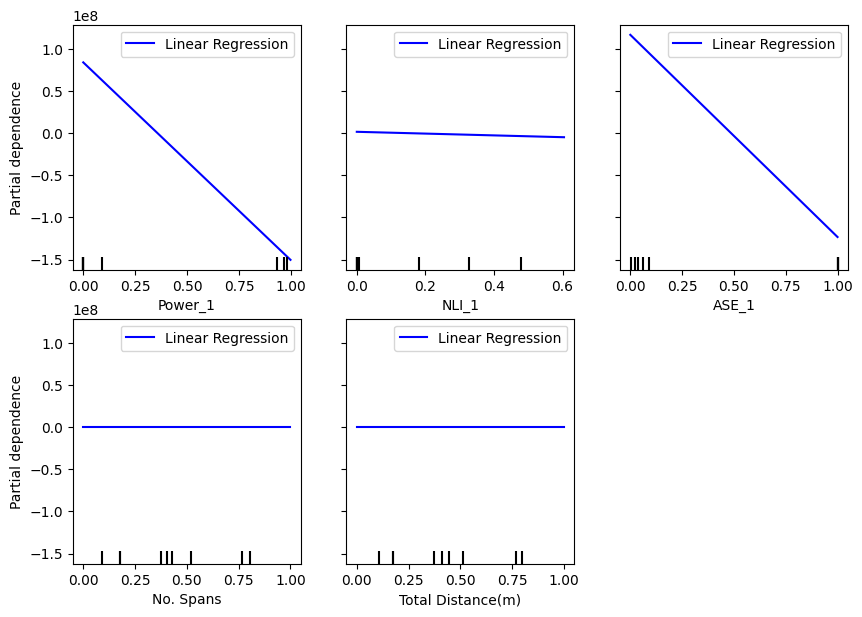

Random Forest Regression: MSE = 0.00002
Calculating PDP for Random Forest Regression on features: ['Power_1', 'NLI_1', 'ASE_1', 'No. Spans', 'Total Distance(m)']


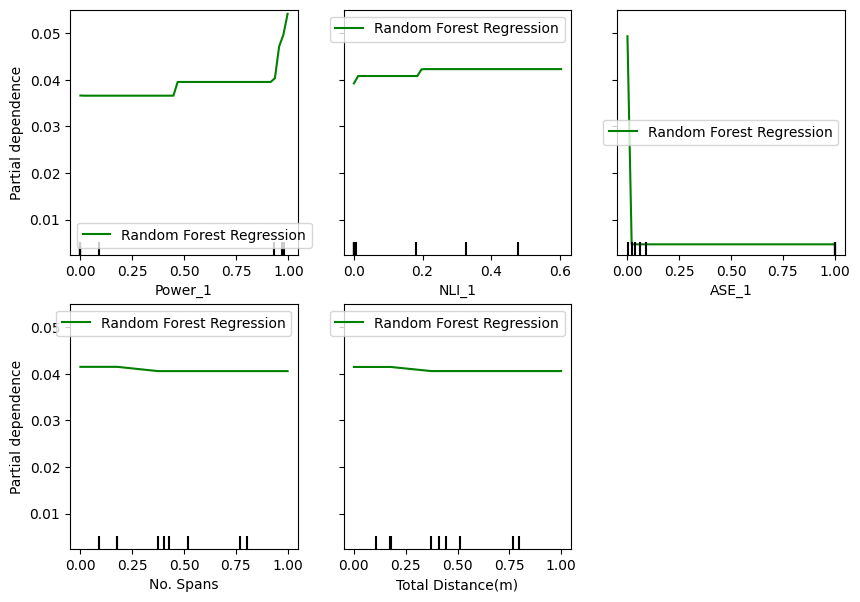

Gradient Boosting Regression: MSE = 0.00002
Calculating PDP for Gradient Boosting Regression on features: ['Power_1', 'NLI_1', 'ASE_1', 'No. Spans', 'Total Distance(m)']


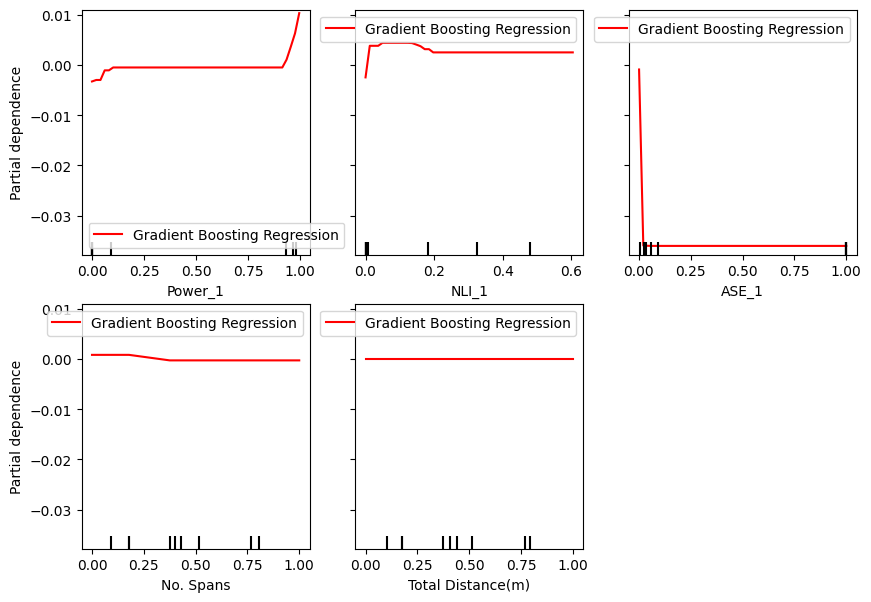

Decision Tree Regression: MSE = 0.00003
Calculating PDP for Decision Tree Regression on features: ['Power_1', 'NLI_1', 'ASE_1', 'No. Spans', 'Total Distance(m)']


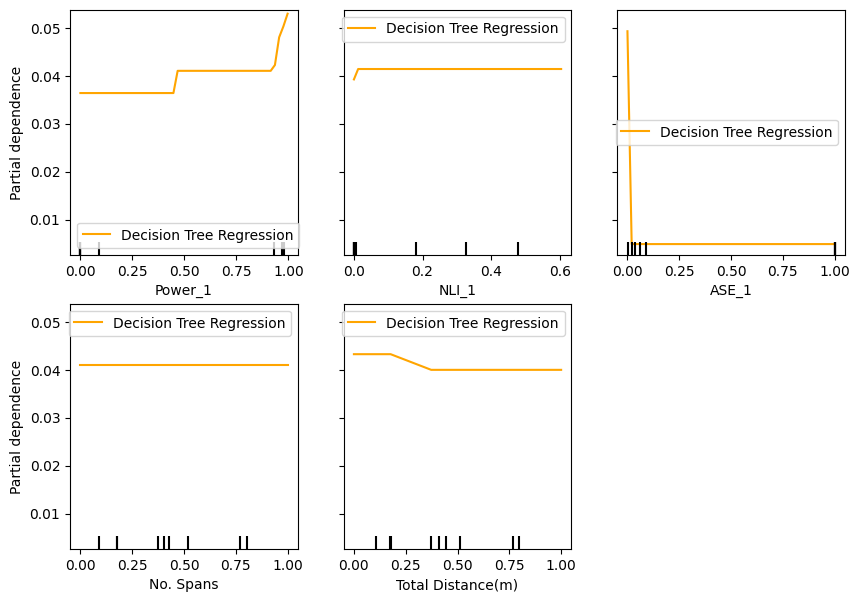

In [25]:
# Define colors for each model
colors = ['blue', 'green', 'red', 'orange']

# Train and evaluate each model on normalized data
for i, (model_name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f"{model_name}: MSE = {mse:.5f}")

    # Calculate and plot PDP for the selected features
    print(f"Calculating PDP for {model_name} on features: {features_to_plot}")

    # Plot PDP
    fig, ax = plt.subplots(figsize=(10, 7))
    display = PartialDependenceDisplay.from_estimator(
        model,
        X_train,
        features_to_plot,
        ax=ax,
        grid_resolution=50,  # Increase grid resolution for smoother plots
        line_kw={'color': colors[i], 'label': model_name}
    )

    plt.show()

## Ice Plot for Individual Feature Influence


Linear Regression - ICE Plot for Power_1:


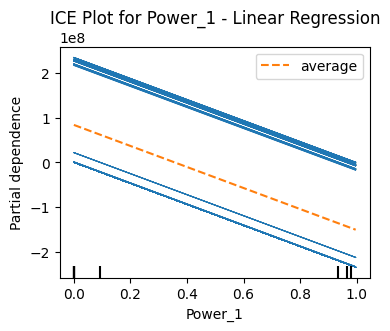

<Figure size 400x300 with 0 Axes>


Linear Regression - ICE Plot for NLI_1:


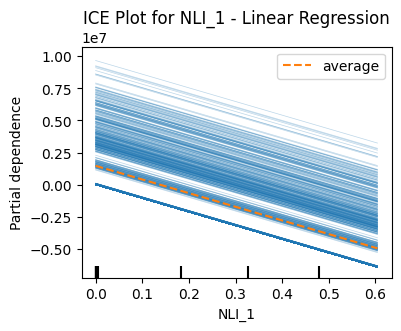

<Figure size 400x300 with 0 Axes>


Linear Regression - ICE Plot for ASE_1:


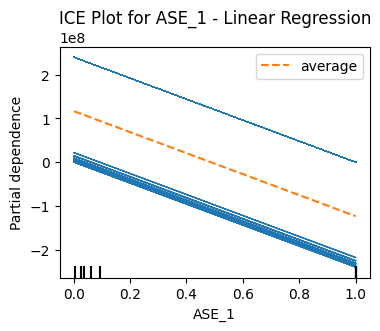

<Figure size 400x300 with 0 Axes>


Linear Regression - ICE Plot for No. Spans:


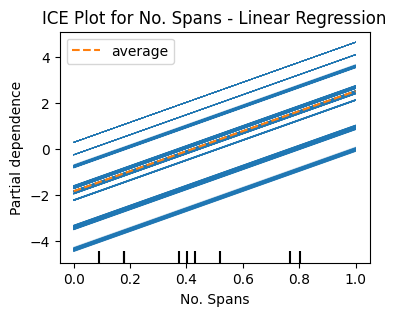

<Figure size 400x300 with 0 Axes>


Linear Regression - ICE Plot for Total Distance(m):


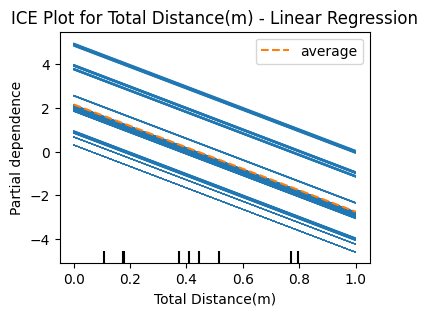

<Figure size 400x300 with 0 Axes>


Random Forest Regression - ICE Plot for Power_1:


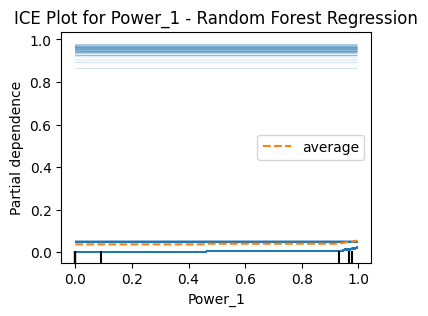

<Figure size 400x300 with 0 Axes>


Random Forest Regression - ICE Plot for NLI_1:


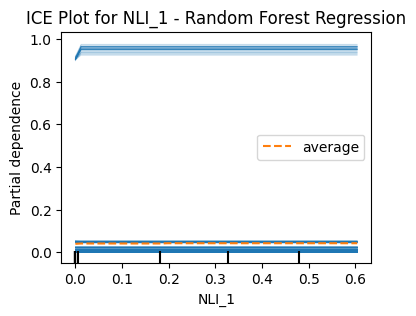

<Figure size 400x300 with 0 Axes>


Random Forest Regression - ICE Plot for ASE_1:


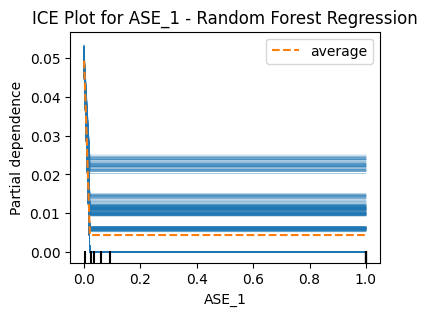

<Figure size 400x300 with 0 Axes>


Random Forest Regression - ICE Plot for No. Spans:


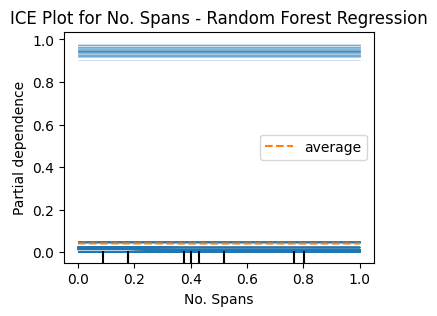

<Figure size 400x300 with 0 Axes>


Random Forest Regression - ICE Plot for Total Distance(m):


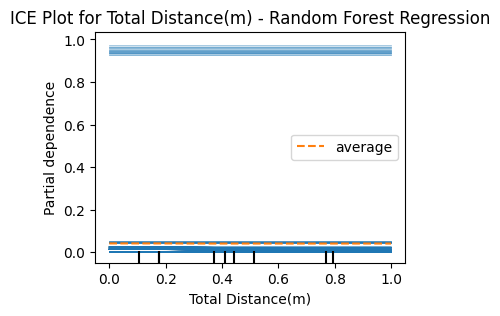

<Figure size 400x300 with 0 Axes>


Gradient Boosting Regression - ICE Plot for Power_1:


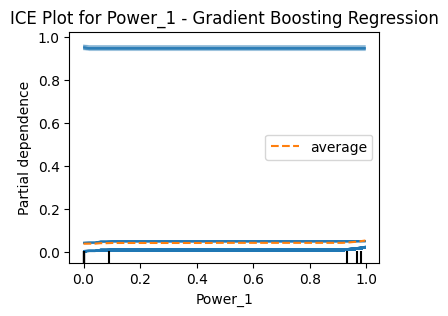

<Figure size 400x300 with 0 Axes>


Gradient Boosting Regression - ICE Plot for NLI_1:


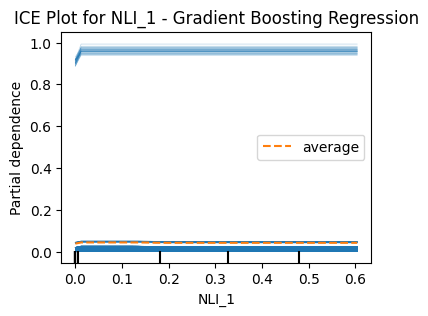

<Figure size 400x300 with 0 Axes>


Gradient Boosting Regression - ICE Plot for ASE_1:


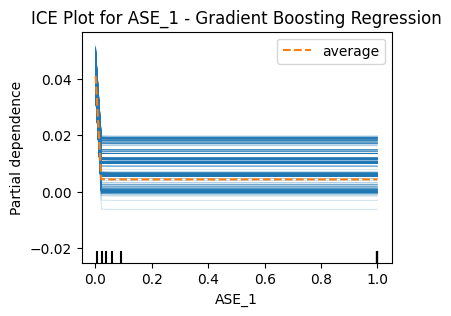

<Figure size 400x300 with 0 Axes>


Gradient Boosting Regression - ICE Plot for No. Spans:


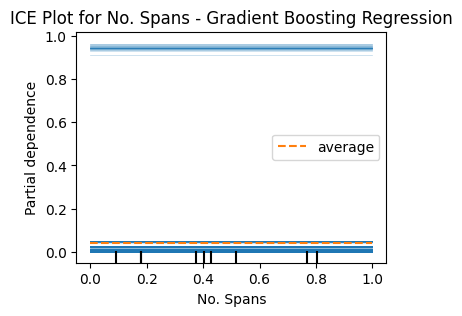

<Figure size 400x300 with 0 Axes>


Gradient Boosting Regression - ICE Plot for Total Distance(m):


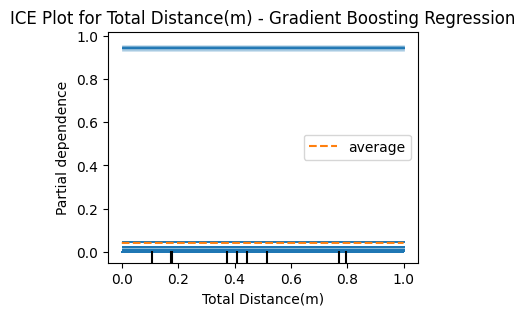

<Figure size 400x300 with 0 Axes>


Decision Tree Regression - ICE Plot for Power_1:


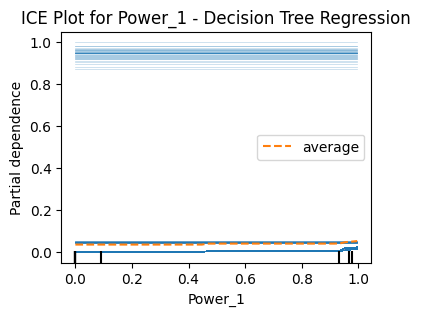

<Figure size 400x300 with 0 Axes>


Decision Tree Regression - ICE Plot for NLI_1:


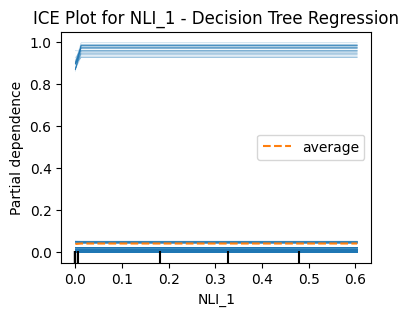

<Figure size 400x300 with 0 Axes>


Decision Tree Regression - ICE Plot for ASE_1:


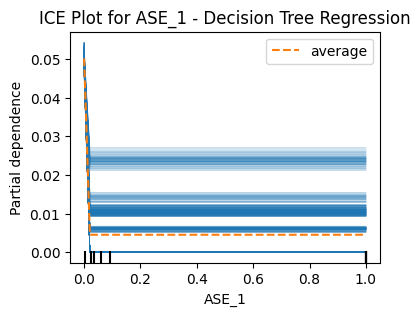

<Figure size 400x300 with 0 Axes>


Decision Tree Regression - ICE Plot for No. Spans:


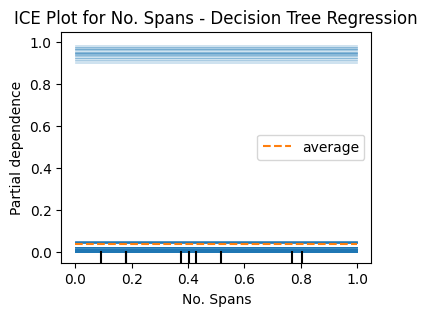

<Figure size 400x300 with 0 Axes>


Decision Tree Regression - ICE Plot for Total Distance(m):


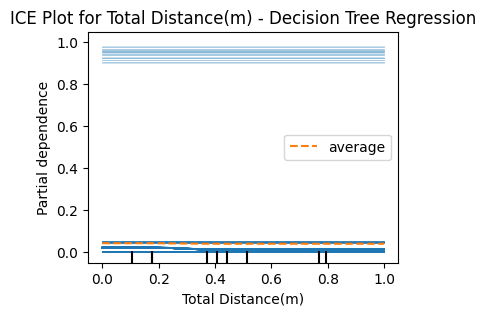

<Figure size 400x300 with 0 Axes>

In [26]:
for model_name, model in models.items():
    model.fit(X_train, y_train)

    for feature in features_to_plot:
        print(f"\n{model_name} - ICE Plot for {feature}:")

        # Plot ICE
        fig, ax = plt.subplots(figsize=(4, 3))
        display = PartialDependenceDisplay.from_estimator(
            model,
            X_train,
            [feature],
            ax=ax,
            kind="both",  # This will plot both PDP and ICE curves
            grid_resolution=50  # Increase grid resolution for smoother plots
        )

        plt.title(f'ICE Plot for {feature} - {model_name}')
        plt.figure(figsize=(4, 3))
        plt.show()

# Saving the Models

you can save the models if you want to

In [27]:
# import joblib

In [28]:
# joblib.dump(models['Linear Regression'], 'Linear_Regression.joblib')
# joblib.dump(models['Random Forest Regression'], 'Random_Forest_Regression.joblib')
# joblib.dump(models['Gradient Boosting Regression'], 'Gradient_Boosting_Regression.joblib')
# joblib.dump(models['Decision Tree Regression'], 'Decision_Tree_Regression.joblib')